# For Excel Dataset

In [35]:
import pandas as pd

# Load the dataset
data = pd.read_excel('hungarian heart disease.xlsx', na_values="?")

In [36]:
# Identify missing values
missing_values = data.isnull().sum()
missing_values_sum = data.isna().sum()
print(missing_values)

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64


In [37]:
# Calculate descriptive statistics
descriptive_stats = data.describe()

In [38]:
# Replace missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Assuming 'object' type for categorical data
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)  # You can use mean() if appropriate

In [39]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

frequency_density = data.apply(pd.value_counts)

C:\Users\Musti Tanvir\AppData\Local\Temp\ipykernel_16740\3664507346.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequency_density = data.apply(pd.value_counts)


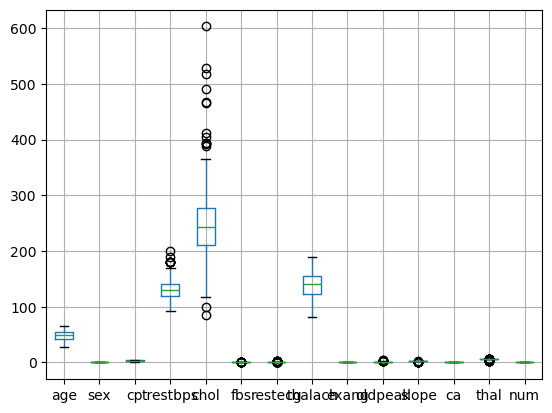

In [40]:
import matplotlib.pyplot as plt
data.boxplot()
plt.show()

In [42]:
%pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xlsxlwriter (from versions: none)
ERROR: No matching distribution found for xlsxlwriter


In [44]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('hungarian heart disease cleaned.xlsx', engine='xlsxwriter')

# Write each DataFrame to a different worksheet
data.to_excel(writer, sheet_name='Cleaned Data', index=False)
missing_values_sum.to_excel(writer, sheet_name='Missing Values Summary')
outliers.to_excel(writer, sheet_name='Outliers')
frequency_density.to_excel(writer, sheet_name='Frequency Density')

# Close the Pandas Excel writer and output the Excel file
writer.close()

# For CSV

In [45]:
# Load the dataset from CSV
data = pd.read_csv('Placement_Data_Full_Class.csv')

# Display basic information to confirm loading and initial data state
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [46]:
missing_values = data.isna().sum()
print(missing_values)

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [47]:
descriptive_stats = data.describe()
print(descriptive_stats)

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [48]:
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical data
        mode = data[column].mode()[0]
        data[column].fillna(mode, inplace=True)
    else:  # Numerical data
        mean = data[column].mean()
        data[column].fillna(mean, inplace=True)

In [58]:
# Select only the numeric columns of the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Now, calculate Q1, Q3, and IQR on just the numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

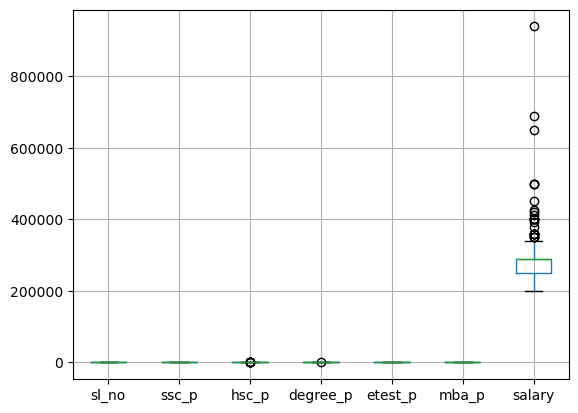

In [59]:
import matplotlib.pyplot as plt
numeric_data.boxplot()
plt.show()

In [51]:
# Save the cleaned DataFrame to a new CSV file
data.to_csv('Placement_Data_Full_Class_cleaned.csv', index=False)

# Optionally, save summaries like missing values and descriptive stats to separate files
missing_values.to_csv('missing_values_summary.csv')
descriptive_stats.to_csv('descriptive_stats_summary.csv')

In [55]:
import xlsxwriter

# Create a new Excel file and add a worksheet
workbook = xlsxwriter.Workbook('Placement_Data_Full_Class_boxplot.xlsx')
worksheet = workbook.add_worksheet()

# Assume 'numeric_data' is a DataFrame containing your cleaned, numeric data
# Write the numeric data to the Excel worksheet
for row_num, (index, row) in enumerate(numeric_data.iterrows()):
    worksheet.write_row(row_num, 0, row.values)

In [57]:
# Close the workbook to save it
workbook.close()